In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
dataset = pd.read_csv('./Dataset/dataset_final.csv')

dataset.head()

,MAC,weekday,server_date,date_esp32,voltage,current,power,frequency,energy,fp,...,WORKSTATION_CPU_POWER,WORKSTATION_CPU_TEMP,WORKSTATION_GPU,WORKSTATION_GPU_POWER,WORKSTATION_GPU_TEMP,WORKSTATION_RAM,WORKSTATION_RAM_POWER,Network_Inbound,Network_Outbound,Inlet_Temperature
0,3C:61:05:12:96:30,4,2021-06-10 02:13:04,2021-06-10 02:13:04,119.9,1.14,125.1,59.9,81.89,0.92,...,36.71,33,1.0,35,15.00,32.29,6.97,3015.548001,2174.112797,36.900
1,3C:61:05:12:96:30,4,2021-06-10 02:13:05,2021-06-10 02:13:05,120.0,1.04,113.3,59.9,81.89,0.91,...,36.71,33,1.0,35,15.00,32.29,6.97,2815.227443,1845.831707,36.900
2,3C:61:05:12:96:30,4,2021-06-10 02:13:06,2021-06-10 02:13:06,119.9,1.17,128.4,60.0,81.89,0.92,...,36.71,33,1.0,35,15.00,32.29,6.97,3208.364882,1567.168730,36.900
3,3C:61:05:12:96:30,4,2021-06-10 02:13:07,2021-06-10 02:13:07,119.9,1.17,128.4,60.0,81.89,0.92,...,36.36,36,2.0,35,14.51,32.45,10.16,2653.700796,1872.211544,38.957
4,3C:61:05:12:96:30,4,2021-06-10 02:13:08,2021-06-10 02:13:08,120.0,1.08,117.9,60.0,81.89,0.91,...,36.36,36,2.0,35,14.51,32.45,10.16,2542.820070,1733.738382,38.957


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119475 entries, 0 to 119474
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   MAC                    119475 non-null  object 
 1   weekday                119475 non-null  int64  
 2   server_date            119475 non-null  object 
 3   date_esp32             119475 non-null  object 
 4   voltage                119475 non-null  float64
 5   current                119475 non-null  float64
 6   power                  119475 non-null  float64
 7   frequency              119475 non-null  float64
 8   energy                 119475 non-null  float64
 9   fp                     119475 non-null  float64
 10  ESP32_temp             119475 non-null  float64
 11  WORKSTATION_CPU        119475 non-null  float64
 12  WORKSTATION_CPU_POWER  119475 non-null  float64
 13  WORKSTATION_CPU_TEMP   119475 non-null  int64  
 14  WORKSTATION_GPU        119475 non-nu

In [5]:
dataset.drop(columns=['MAC','weekday','server_date','server_date','date_esp32'], inplace=True,axis=1)

In [6]:
dataset.head()

,voltage,current,power,frequency,energy,fp,ESP32_temp,WORKSTATION_CPU,WORKSTATION_CPU_POWER,WORKSTATION_CPU_TEMP,WORKSTATION_GPU,WORKSTATION_GPU_POWER,WORKSTATION_GPU_TEMP,WORKSTATION_RAM,WORKSTATION_RAM_POWER,Network_Inbound,Network_Outbound,Inlet_Temperature
0,119.9,1.14,125.1,59.9,81.89,0.92,33.89,11.28,36.71,33,1.0,35,15.00,32.29,6.97,3015.548001,2174.112797,36.900
1,120.0,1.04,113.3,59.9,81.89,0.91,33.89,11.28,36.71,33,1.0,35,15.00,32.29,6.97,2815.227443,1845.831707,36.900
2,119.9,1.17,128.4,60.0,81.89,0.92,33.89,11.28,36.71,33,1.0,35,15.00,32.29,6.97,3208.364882,1567.168730,36.900
3,119.9,1.17,128.4,60.0,81.89,0.92,33.89,13.67,36.36,36,2.0,35,14.51,32.45,10.16,2653.700796,1872.211544,38.957
4,120.0,1.08,117.9,60.0,81.89,0.91,33.89,13.67,36.36,36,2.0,35,14.51,32.45,10.16,2542.820070,1733.738382,38.957


In [7]:
dataset.shape

(119475, 18)

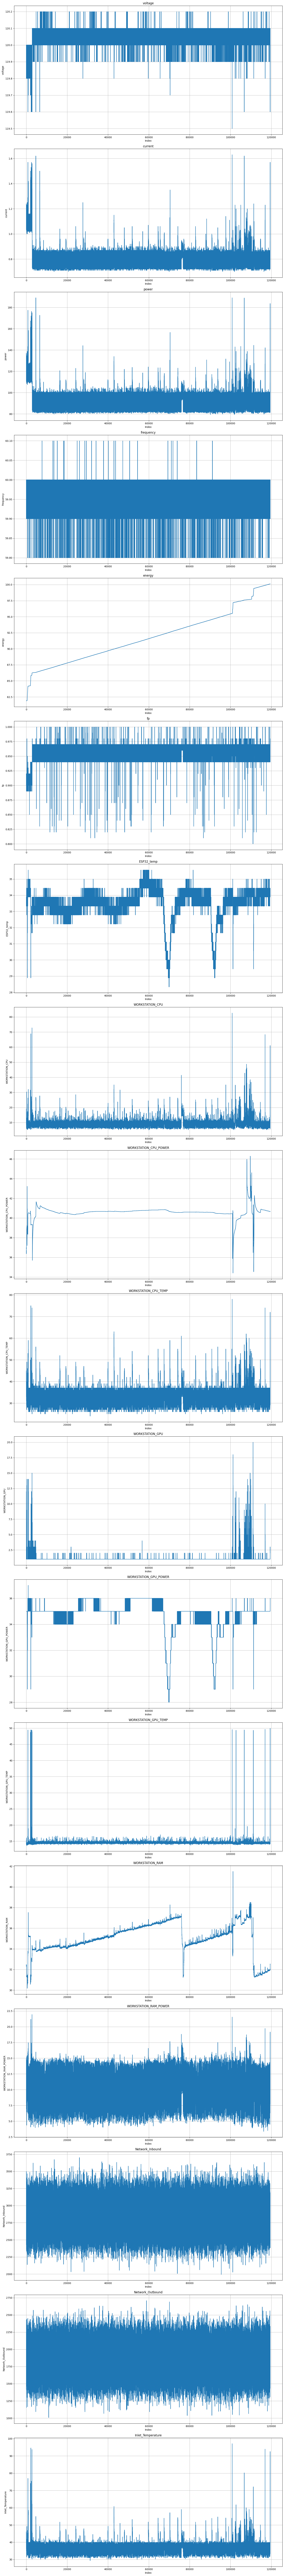

In [11]:
# Number of columns
num_columns = dataset.shape[1]

# Create subplots
fig, axs = plt.subplots(num_columns, 1, figsize=(16, 8 * num_columns))

# Plot each column
for i, column in enumerate(dataset.columns):
    axs[i].plot(dataset.index, dataset[column])
    axs[i].set_title(column)
    axs[i].set_xlabel('Index')
    axs[i].set_ylabel(column)
    axs[i].grid()

plt.tight_layout()  # Adjusts subplot params for better layout
plt.show()

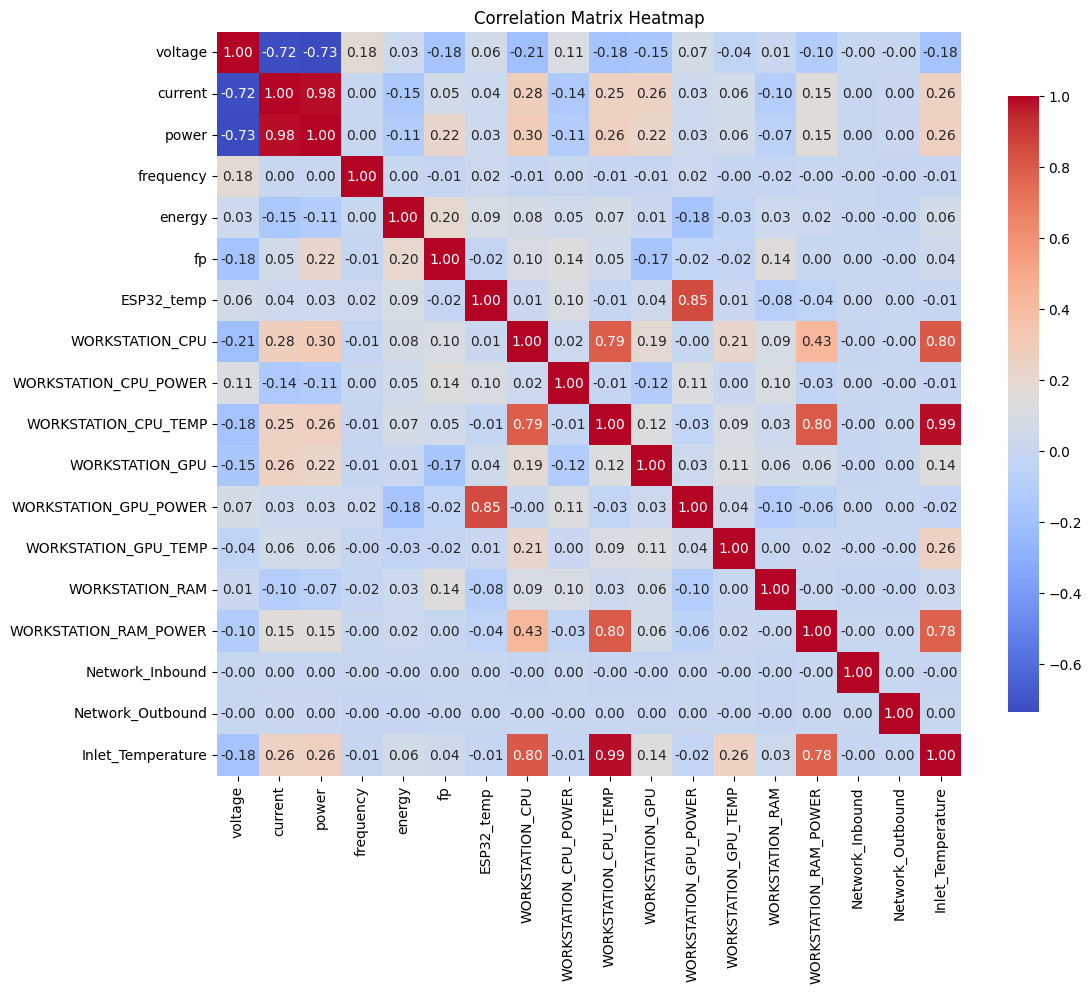

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(dataset.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [13]:
dataset.drop(columns=['ESP32_temp','fp','WORKSTATION_CPU','WORKSTATION_RAM_POWER'], inplace=True,axis=1)

In [14]:
# preprocessing the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
scaled_data = scaler.fit_transform(dataset)

In [16]:
scaled_data

array([[0.57142857, 0.47311828, 0.41712204, ..., 0.598183  , 0.6857911 ,
        0.1112686 ],
       [0.71428571, 0.3655914 , 0.30965392, ..., 0.48096097, 0.49265687,
        0.1112686 ],
       [0.57142857, 0.50537634, 0.44717668, ..., 0.7110141 , 0.32871395,
        0.1112686 ],
       ...,
       [0.85714286, 0.07526882, 0.09289617, ..., 0.67064186, 0.62448197,
        0.15055811],
       [0.85714286, 0.10752688, 0.10655738, ..., 0.38209944, 0.2495699 ,
        0.15055811],
       [0.71428571, 0.19354839, 0.21220401, ..., 0.38676009, 0.78041735,
        0.15055811]])

In [17]:
train_size = int(len(scaled_data)*0.8)
test_size = len(scaled_data) - train_size

train_size, test_size

(95580, 23895)

In [18]:
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

In [19]:
train_X = []
train_Y = []

n_future = 1
n_past = 100


for i in range(n_past, len(train_data)-n_future+1):
    train_X.append(train_data[i-n_past:i, 0:train_data.shape[1]])
    train_Y.append(train_data[i+n_future-1:i+n_future,13])

train_X, train_Y = np.array(train_X), np.array(train_Y)

train_X.shape, train_Y.shape

((95480, 100, 14), (95480, 1))

In [20]:
test_X = []
test_Y = []

n_future = 1
n_past = 20


for i in range(n_past, len(test_data)-n_future+1):
    test_X.append(test_data[i-n_past:i, 0:test_data.shape[1]])
    test_Y.append(test_data[i+n_future-1:i+n_future,13])

test_X, test_Y = np.array(test_X), np.array(test_Y)

test_X.shape, test_Y.shape

((23875, 20, 14), (23875, 1))

Build LSTM Multi Variant Model

In [21]:
# create LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [22]:
model = Sequential()

model.add(LSTM(units = 128,activation='relu', return_sequences=True, input_shape = (train_X.shape[1],train_X.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 64,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 32,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(units = 1))

c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'mean_squared_error')

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        73,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 64)        │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 135,073 (527.63 KB)

 Trainable params: 135,073 (527.63 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
early_stopping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True,
)

In [27]:
history = model.fit(train_X,train_Y, validation_data = (test_X, test_Y), epochs = 100,batch_size=100, callbacks = [early_stopping],verbose = 1, shuffle = True)

Epoch 1/100
955/955 ━━━━━━━━━━━━━━━━━━━━ 204s 213ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 2/100
955/955 ━━━━━━━━━━━━━━━━━━━━ 226s 237ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 3/100
955/955 ━━━━━━━━━━━━━━━━━━━━ 327s 342ms/step - loss: 8.5843e-04 - val_loss: 0.0011
Epoch 4/100
955/955 ━━━━━━━━━━━━━━━━━━━━ 640s 671ms/step - loss: 7.8150e-04 - val_loss: 9.6181e-04
Epoch 5/100
955/955 ━━━━━━━━━━━━━━━━━━━━ 591s 619ms/step - loss: 7.3009e-04 - val_loss: 8.8518e-04
Epoch 6/100
955/955 ━━━━━━━━━━━━━━━━━━━━ 572s 599ms/step - loss: 7.2247e-04 - val_loss: 8.9449e-04
Epoch 7/100
955/955 ━━━━━━━━━━━━━━━━━━━━ 364s 381ms/step - loss: 6.4880e-04 - val_loss: 8.5395e-04
Epoch 8/100
955/955 ━━━━━━━━━━━━━━━━━━━━ 358s 374ms/step - loss: 6.0385e-04 - val_loss: 8.8464e-04
Epoch 9/100
955/955 ━━━━━━━━━━━━━━━━━━━━ 370s 387ms/step - loss: 6.0622e-04 - val_loss: 9.0517e-04
Epoch 10/100
955/955 ━━━━━━━━━━━━━━━━━━━━ 383s 401ms/step - loss: 5.7756e-04 - val_loss: 9.0003e-04
Epoch 11/100
955/955 ━━━━━━━━

In [28]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [29]:
predict = model.predict(test_X)

747/747 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step


In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

In [31]:
math.sqrt(mean_squared_error(test_Y,predict))

0.029222341699485916

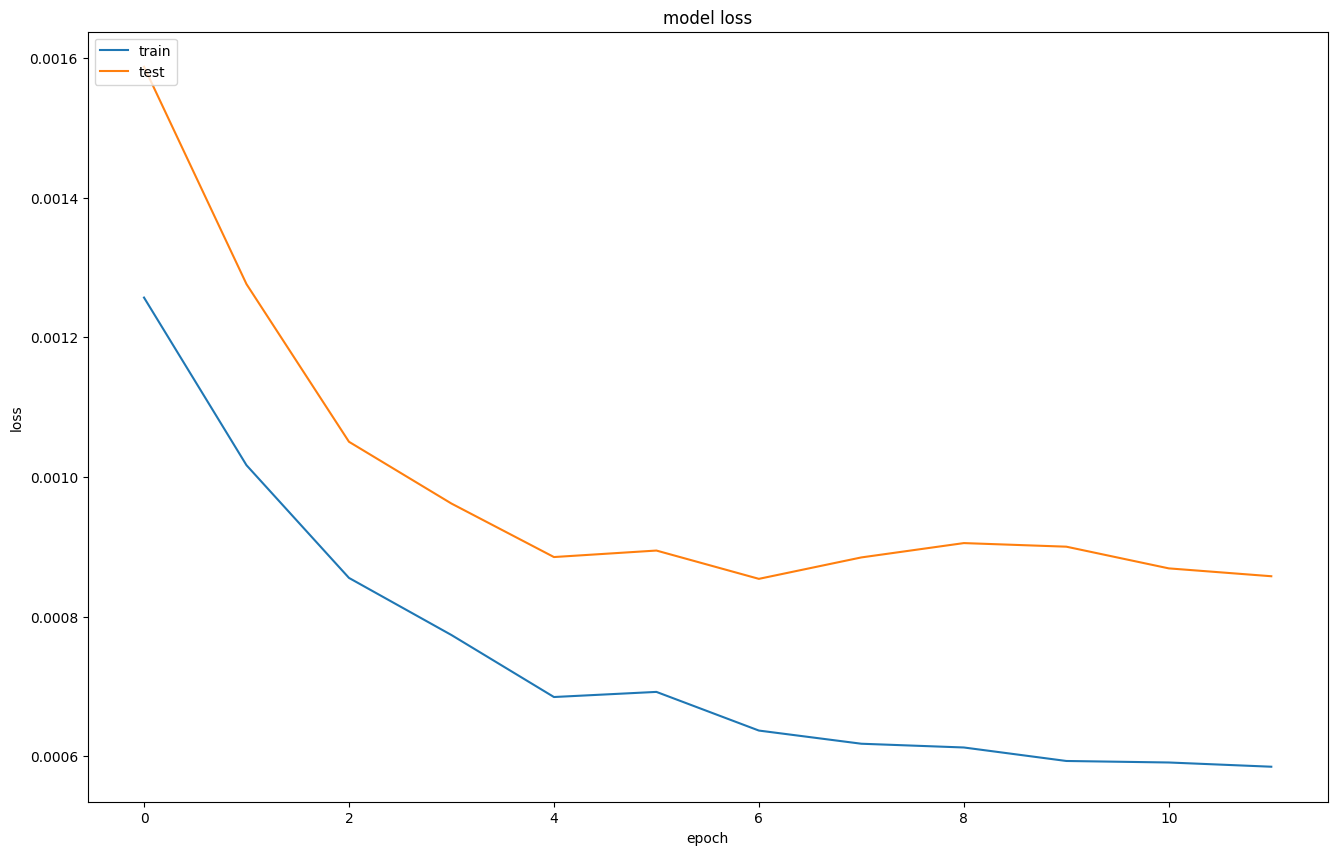

In [42]:
# summarize history for loss
plt.figure(figsize=(16,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

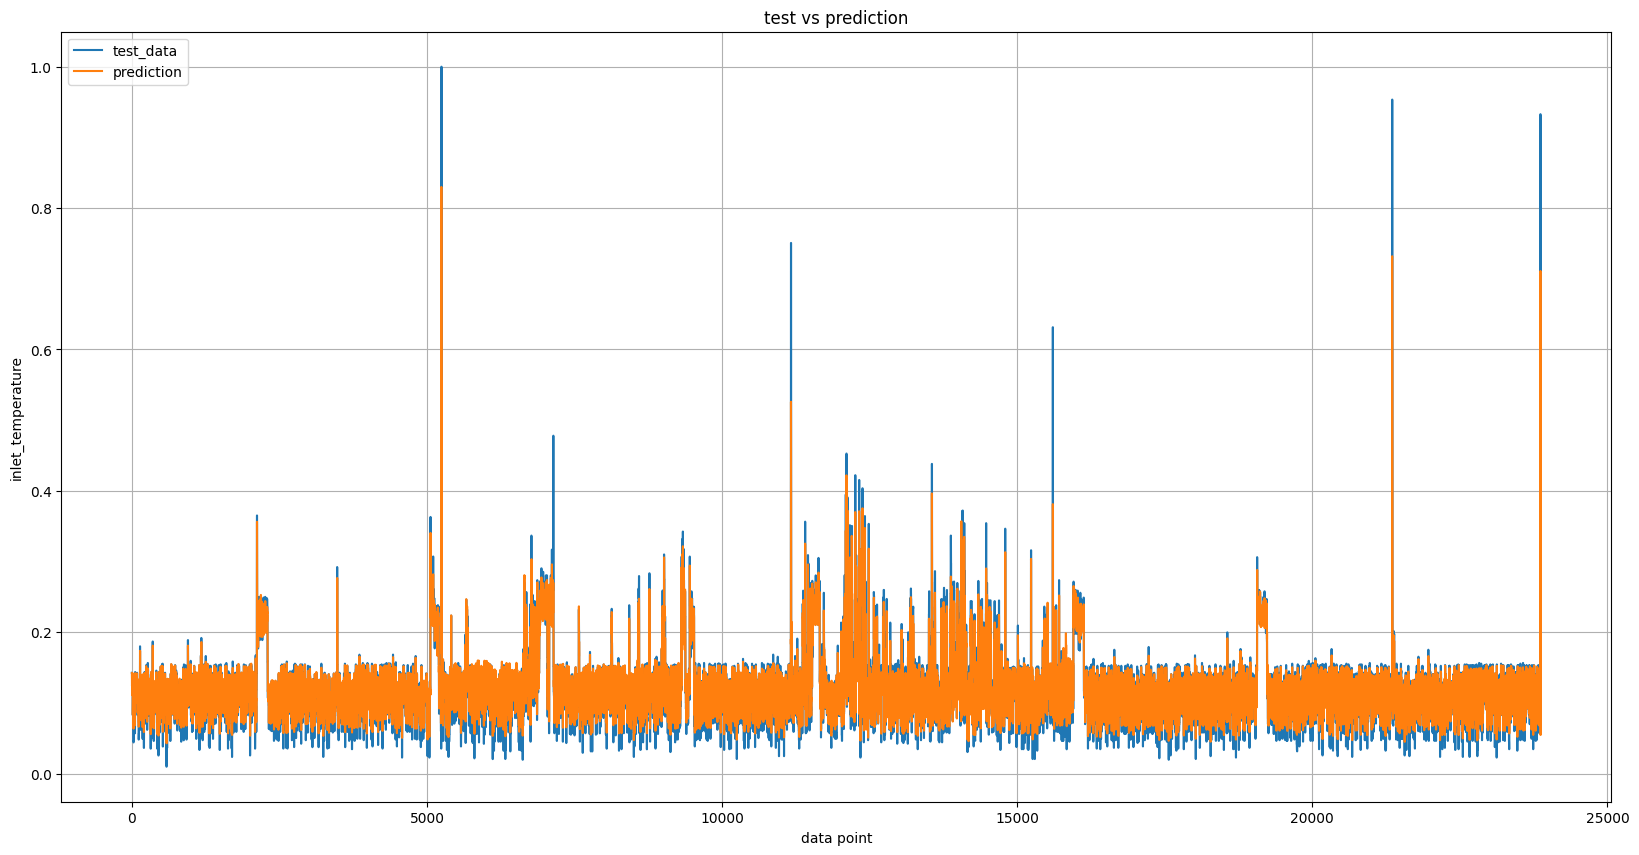

In [43]:
plt.figure(figsize=(20, 10))
plt.plot(test_Y)
plt.plot(predict)
plt.title('test vs prediction')
plt.ylabel('inlet_temperature')
plt.xlabel('data point')
plt.legend(['test_data', 'prediction'], loc='upper left')
plt.grid()
plt.show()

In [34]:
model.save('model_thermal.h5')